In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet  # For more accurate lemmatization

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [4]:
# Downloading necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saisab31\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saisab31\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saisab31\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saisab31\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [5]:
reviews = [
    "<br> I LOVED this movie!!! The plot was 10/10, so exciting & the characters were AMAZING!!! :D",
    "Terrible movie... Waste of $$ and time!! I won't recommend to ANYONE... http://badmovie.com",
    "An average film -- some good moments, but overall it was sooo predictable and boring :(",
    "Fantastic performance by the lead actor!!! Brilliant cinematography, though a bit too long...",
    "Bad script, poor direction. 1234 Not worth watching at ALL <html>skip</html>.",
]

In [6]:
# loading the dataset!
df = pd.read_csv("movie_reviews_dirty.csv")
# Display the first few rows of the DataFrame
print(df.head())

                                              review
0  <br> I LOVED this movie!!! The plot was 10/10,...
1  Terrible movie... Waste of $$ and time!! I won...
2  An average film -- some good moments, but over...
3  Fantastic performance by the lead actor!!! Bri...
4  Bad script, poor direction. 1234 Not worth wat...


In [ ]:
# 1. initial cleaning of text
# function for initial cleaning of text
def clean_text_initial(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove Punctuation (keep only alphanumeric characters and whitespace)
    # [^...] matches any character NOT in the set. \w matches word characters (alphanumeric + underscore). \s matches whitespace.
    text = re.sub(r"[^\w\s]", "", text)

    # 3. Remove Numbers (digits)
    # \d+ matches one or more digits.
    text = re.sub(r"\d+", "", text)

    # 4. Normalize Whitespace (replace multiple spaces with a single space and strip leading/trailing)
    # \s+ matches one or more whitespace characters.
    text = re.sub(r"\s+", " ", text).strip()
    return text


# apply the function to the 'review' column
df["cleaned_data_initial"] = df["review"].apply(clean_text_initial)

for i in range(6):
    print(f"Original:   {df['review'].iloc[i]}")
    print(f"Cleaned:    {df['cleaned_data_initial'].iloc[i]}\n")

Original:   <br> I LOVED this movie!!! The plot was 10/10, so exciting & the characters were AMAZING!!! :D
Cleaned:    br i loved this movie the plot was so exciting the characters were amazing d

Original:   Terrible movie... Waste of $$ and time!! I won't recommend to ANYONE... http://badmovie.com
Cleaned:    terrible movie waste of and time i wont recommend to anyone httpbadmoviecom

Original:   An average film -- some good moments, but overall it was sooo predictable and boring :(
Cleaned:    an average film some good moments but overall it was sooo predictable and boring

Original:   Fantastic performance by the lead actor!!! Brilliant cinematography, though a bit too long...
Cleaned:    fantastic performance by the lead actor brilliant cinematography though a bit too long

Original:   Bad script, poor direction. 1234 Not worth watching at ALL <html>skip</html>.
Cleaned:    bad script poor direction not worth watching at all htmlskiphtml

Original:   Mediocre at best... acting was

In [ ]:
# 2. tokenization
# tokenizing the cleaned reviews using NLTK's word_tokenize
df["tokenized_review"] = df["cleaned_data_initial"].apply(word_tokenize)

for i in range(6):
    print(f"Cleaned:    {df['cleaned_data_initial'].iloc[i]}")
    print(f"Tokenized:  {df['tokenized_review'].iloc[i]}\n")

Cleaned:    br i loved this movie the plot was so exciting the characters were amazing d
Tokenized:  ['br', 'i', 'loved', 'this', 'movie', 'the', 'plot', 'was', 'so', 'exciting', 'the', 'characters', 'were', 'amazing', 'd']

Cleaned:    terrible movie waste of and time i wont recommend to anyone httpbadmoviecom
Tokenized:  ['terrible', 'movie', 'waste', 'of', 'and', 'time', 'i', 'wont', 'recommend', 'to', 'anyone', 'httpbadmoviecom']

Cleaned:    an average film some good moments but overall it was sooo predictable and boring
Tokenized:  ['an', 'average', 'film', 'some', 'good', 'moments', 'but', 'overall', 'it', 'was', 'sooo', 'predictable', 'and', 'boring']

Cleaned:    fantastic performance by the lead actor brilliant cinematography though a bit too long
Tokenized:  ['fantastic', 'performance', 'by', 'the', 'lead', 'actor', 'brilliant', 'cinematography', 'though', 'a', 'bit', 'too', 'long']

Cleaned:    bad script poor direction not worth watching at all htmlskiphtml
Tokenized:  ['b

In [ ]:
# 3. removing stop words from the tokenized reviews

# get stopwrords from NLTK
stop_words = set(stopwords.words("english"))


# function to reomve stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]


# apply the function to the 'tokenized_review' column
df["stopwords_removed"] = df["tokenized_review"].apply(remove_stopwords)

for i in range(6):
    print(f"Tokenized:  {df['tokenized_review'].iloc[i]}")
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}\n")

Tokenized:  ['br', 'i', 'loved', 'this', 'movie', 'the', 'plot', 'was', 'so', 'exciting', 'the', 'characters', 'were', 'amazing', 'd']
Stopwords Removed: ['br', 'loved', 'movie', 'plot', 'exciting', 'characters', 'amazing']

Tokenized:  ['terrible', 'movie', 'waste', 'of', 'and', 'time', 'i', 'wont', 'recommend', 'to', 'anyone', 'httpbadmoviecom']
Stopwords Removed: ['terrible', 'movie', 'waste', 'time', 'wont', 'recommend', 'anyone', 'httpbadmoviecom']

Tokenized:  ['an', 'average', 'film', 'some', 'good', 'moments', 'but', 'overall', 'it', 'was', 'sooo', 'predictable', 'and', 'boring']
Stopwords Removed: ['average', 'film', 'good', 'moments', 'overall', 'sooo', 'predictable', 'boring']

Tokenized:  ['fantastic', 'performance', 'by', 'the', 'lead', 'actor', 'brilliant', 'cinematography', 'though', 'a', 'bit', 'too', 'long']
Stopwords Removed: ['fantastic', 'performance', 'lead', 'actor', 'brilliant', 'cinematography', 'though', 'bit', 'long']

Tokenized:  ['bad', 'script', 'poor', 'di

In [10]:
# 4. normalization a. Stemming

# stemming function from nltk
porter_stemmer = PorterStemmer()


def apply_stemming(tokens):
    return [porter_stemmer.stem(word) for word in tokens]


df["stemmed_review"] = df["stopwords_removed"].apply(apply_stemming)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"Stemmed: {df['stemmed_review'].iloc[i]}\n")

Stopwords Removed: ['br', 'loved', 'movie', 'plot', 'exciting', 'characters', 'amazing']
Stemmed: ['br', 'love', 'movi', 'plot', 'excit', 'charact', 'amaz']

Stopwords Removed: ['terrible', 'movie', 'waste', 'time', 'wont', 'recommend', 'anyone', 'httpbadmoviecom']
Stemmed: ['terribl', 'movi', 'wast', 'time', 'wont', 'recommend', 'anyon', 'httpbadmoviecom']

Stopwords Removed: ['average', 'film', 'good', 'moments', 'overall', 'sooo', 'predictable', 'boring']
Stemmed: ['averag', 'film', 'good', 'moment', 'overal', 'sooo', 'predict', 'bore']

Stopwords Removed: ['fantastic', 'performance', 'lead', 'actor', 'brilliant', 'cinematography', 'though', 'bit', 'long']
Stemmed: ['fantast', 'perform', 'lead', 'actor', 'brilliant', 'cinematographi', 'though', 'bit', 'long']

Stopwords Removed: ['bad', 'script', 'poor', 'direction', 'worth', 'watching', 'htmlskiphtml']
Stemmed: ['bad', 'script', 'poor', 'direct', 'worth', 'watch', 'htmlskiphtml']

Stopwords Removed: ['mediocre', 'best', 'acting', '

In [11]:
# 4. normalization b. Lemmatization with POS tagging
# lemmatization function from nltk
lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match found


def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]


df["pos_lemmatized_review"] = df["stopwords_removed"].apply(apply_lemmatization)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"POS Lemmatized: {df['pos_lemmatized_review'].iloc[i]}\n")

Stopwords Removed: ['br', 'loved', 'movie', 'plot', 'exciting', 'characters', 'amazing']
POS Lemmatized: ['br', 'loved', 'movie', 'plot', 'exciting', 'character', 'amazing']

Stopwords Removed: ['terrible', 'movie', 'waste', 'time', 'wont', 'recommend', 'anyone', 'httpbadmoviecom']
POS Lemmatized: ['terrible', 'movie', 'waste', 'time', 'wont', 'recommend', 'anyone', 'httpbadmoviecom']

Stopwords Removed: ['average', 'film', 'good', 'moments', 'overall', 'sooo', 'predictable', 'boring']
POS Lemmatized: ['average', 'film', 'good', 'moment', 'overall', 'sooo', 'predictable', 'boring']

Stopwords Removed: ['fantastic', 'performance', 'lead', 'actor', 'brilliant', 'cinematography', 'though', 'bit', 'long']
POS Lemmatized: ['fantastic', 'performance', 'lead', 'actor', 'brilliant', 'cinematography', 'though', 'bit', 'long']

Stopwords Removed: ['bad', 'script', 'poor', 'direction', 'worth', 'watching', 'htmlskiphtml']
POS Lemmatized: ['bad', 'script', 'poor', 'direction', 'worth', 'watching',

In [12]:
# 4. normalization b. Lemmatization without POS tagging
# lemmatization function from nltk
lemmatizer = WordNetLemmatizer()


def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]


df["lemmatized_review"] = df["stopwords_removed"].apply(apply_lemmatization)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"Lemmatized: {df['lemmatized_review'].iloc[i]}\n")

Stopwords Removed: ['br', 'loved', 'movie', 'plot', 'exciting', 'characters', 'amazing']
Lemmatized: ['br', 'loved', 'movie', 'plot', 'exciting', 'character', 'amazing']

Stopwords Removed: ['terrible', 'movie', 'waste', 'time', 'wont', 'recommend', 'anyone', 'httpbadmoviecom']
Lemmatized: ['terrible', 'movie', 'waste', 'time', 'wont', 'recommend', 'anyone', 'httpbadmoviecom']

Stopwords Removed: ['average', 'film', 'good', 'moments', 'overall', 'sooo', 'predictable', 'boring']
Lemmatized: ['average', 'film', 'good', 'moment', 'overall', 'sooo', 'predictable', 'boring']

Stopwords Removed: ['fantastic', 'performance', 'lead', 'actor', 'brilliant', 'cinematography', 'though', 'bit', 'long']
Lemmatized: ['fantastic', 'performance', 'lead', 'actor', 'brilliant', 'cinematography', 'though', 'bit', 'long']

Stopwords Removed: ['bad', 'script', 'poor', 'direction', 'worth', 'watching', 'htmlskiphtml']
Lemmatized: ['bad', 'script', 'poor', 'direction', 'worth', 'watching', 'htmlskiphtml']

St

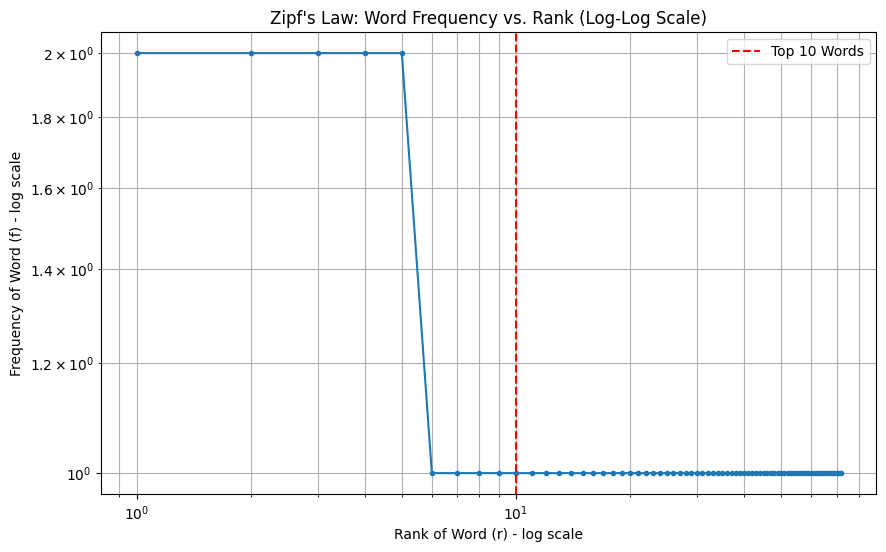


--- Top 10 Most Frequent Lemmatized Words ---
Rank 1: 'loved' (Frequency: 2)
Rank 2: 'movie' (Frequency: 2)
Rank 3: 'film' (Frequency: 2)
Rank 4: 'cinematography' (Frequency: 2)
Rank 5: 'best' (Frequency: 2)
Rank 6: 'br' (Frequency: 1)
Rank 7: 'plot' (Frequency: 1)
Rank 8: 'exciting' (Frequency: 1)
Rank 9: 'character' (Frequency: 1)
Rank 10: 'amazing' (Frequency: 1)

--- Zipf's Law: Frequency * Rank for Top 5 ---
Rank 1: 'loved' (Freq: 2) -> Freq * Rank: 2
Rank 2: 'movie' (Freq: 2) -> Freq * Rank: 4
Rank 3: 'film' (Freq: 2) -> Freq * Rank: 6
Rank 4: 'cinematography' (Freq: 2) -> Freq * Rank: 8
Rank 5: 'best' (Freq: 2) -> Freq * Rank: 10


In [13]:
# Zipf's law demo check
all_lemmas = [word for sublist in df["lemmatized_review"] for word in sublist]
# Get word frequencies
word_counts = Counter(all_lemmas)
# Sort words by frequency in descending order
sorted_word_counts = word_counts.most_common()

# Extract frequencies and ranks
frequencies = [count for word, count in sorted_word_counts]
ranks = list(range(1, len(frequencies) + 1))

# Check for empty lists to avoid log(0) errors
if not frequencies:
    print("No words found after preprocessing. Cannot calculate Zipf's Law.")
else:
    # Plotting for Zipf's Law
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker=".", linestyle="-")
    plt.title("Zipf's Law: Word Frequency vs. Rank (Log-Log Scale)")
    plt.xlabel("Rank of Word (r) - log scale")
    plt.ylabel("Frequency of Word (f) - log scale")
    plt.grid(True, which="both", ls="-")
    plt.axvline(
        x=10, color="r", linestyle="--", label="Top 10 Words"
    )  # Highlight top few words
    plt.legend()
    plt.show()

    print("\n--- Top 10 Most Frequent Lemmatized Words ---")
    for i, (word, count) in enumerate(sorted_word_counts[:10]):
        print(f"Rank {i + 1}: '{word}' (Frequency: {count})")

    # A quick check for the Zipfian relationship: f(r) * r should be roughly constant
    print("\n--- Zipf's Law: Frequency * Rank for Top 5 ---")
    for i in range(min(5, len(frequencies))):
        rank = ranks[i]
        freq = frequencies[i]
        if rank > 0:  # Avoid division by zero
            print(
                f"Rank {rank}: '{sorted_word_counts[i][0]}' (Freq: {freq}) -> Freq * Rank: {freq * rank}"
            )

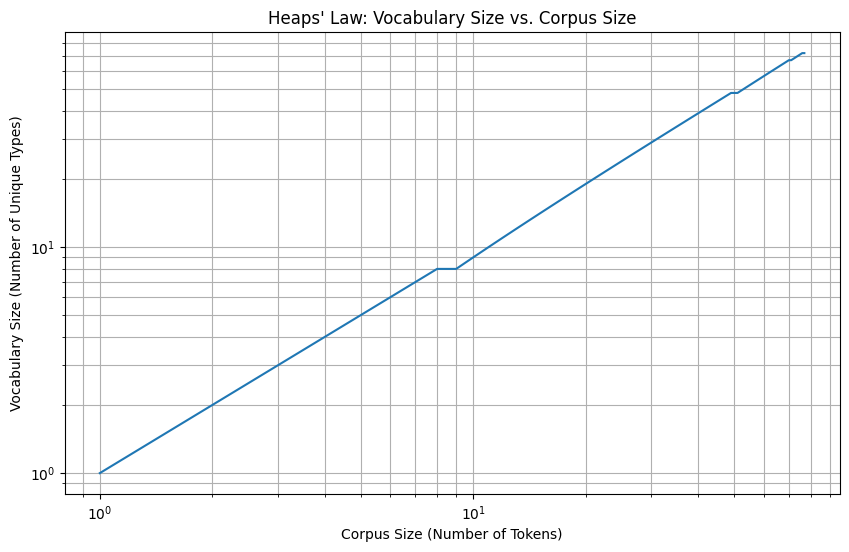


--- Heaps' Law Observations ---
Initial 100 tokens: 72 unique types
Final 77 tokens: 72 unique types


In [15]:
# Heaps law demo check
cumulative_tokens = []
cumulative_types = []
seen_types = set()
token_count = 0

for review_tokens in df["lemmatized_review"]:
    for token in review_tokens:
        token_count += 1
        seen_types.add(token)
        cumulative_tokens.append(token_count)
        cumulative_types.append(len(seen_types))

# Plotting for Heaps' Law
if not cumulative_tokens:
    print("No tokens found. Cannot calculate Heaps' Law.")
else:
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_tokens, cumulative_types)
    plt.title("Heaps' Law: Vocabulary Size vs. Corpus Size")
    plt.xlabel("Corpus Size (Number of Tokens)")
    plt.ylabel("Vocabulary Size (Number of Unique Types)")
    plt.grid(True, which="both", ls="-")
    plt.xscale("log")  # Log scale for x-axis to better show the sub-linear growth
    plt.yscale("log")  # Log scale for y-axis
    plt.show()

    # You can also try to fit the curve to estimate K and beta, but that's more advanced
    # For now, just observing the curve is sufficient for understanding.

print("\n--- Heaps' Law Observations ---")
print(
    f"Initial 100 tokens: {cumulative_types[min(99, len(cumulative_types) - 1)]} unique types"
)
print(f"Final {cumulative_tokens[-1]} tokens: {cumulative_types[-1]} unique types")